# Assignment 4

# Ahmad Raja
# ET22MTECH14002

## Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize, stats

In [2]:
# Creating a dataframe and importing the data in it from the link
df = pd.read_csv("C:/Users/AHMAD/Desktop/testdata3.csv")
x = df["#x"]
y= df['y']
sigma_y = df['sigma_y']

In [3]:
#initialise theta for all the fits to zero
val1 = np.array([0, 0])
val2 = np.array([0, 0, 0])
val3 = np.array([0, 0, 0, 0])


In [4]:
#Defining the required functions for fitting
def linearFunc(x, val1):
    return val1[1]*x+val1[0]

def quadraticFunc(x, val2):
    return val2[2]*x**2 + val2[1]*x + val2[0]

def cubicFunc(x, val3):
    return val3[3]*x**3 + val3[2]*x**2 + val3[1]*x + val3[0]

In [5]:
#The log-likelihood function
#The log-likelihood function is maximum for best fitting value of theta
def logL(theta, n):
    if n==1:
        y_fit = linearFunc(x, theta)
    elif n==2:
        y_fit = quadraticFunc(x, theta)
    elif n==3:
         y_fit = cubicFunc(x, theta)
    return sum(stats.norm.logpdf(*args)
            for args in zip(y, y_fit, sigma_y))
    


In [6]:
#This function returns the best theta for the fitting
def best_theta(n, theta_val):
    if n==1:
        theta_0 = (n+1)*[0]
        neg_logL = lambda theta: -logL(theta, 1)
        return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)
    if n==2:
        theta_0 = (n+1)*[0]
        neg_logL = lambda theta: -logL(theta, 2)
        return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)
    if n==3:
        theta_0 = (n+1)*[0]
        neg_logL = lambda theta: -logL(theta, 3)
        return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

In [7]:
#compute chi2 likelihood for frequentist
def compute_chi2(n):
    if n==1:
        theta = best_theta(n, val1)
        resid = ((y - linearFunc(x, theta)) / sigma_y)
    elif n==2:
        theta = best_theta(n, val2)
        resid = ((y - quadraticFunc(x, theta)) / sigma_y)
    elif n==3:
        theta = best_theta(n, val3)
        resid = ((y - cubicFunc(x, theta)) / sigma_y)
    return np.sum(resid ** 2)

In [8]:
data = [x, y, sigma_y]
def compute_dof(degree, data=data):
    return int(''.join(map(str, np.shape(data[1])))) - (degree + 1)
def chi2_likelihood(n):
    dof = compute_dof(n)
    return stats.chi2(dof).pdf(compute_chi2(n))


In [9]:
#Compute the p value for the fit using linear model as the null hypothesis
def p_val(n):
    return 1-stats.chi2(n-1).cdf(compute_chi2(1) - compute_chi2(n))
#Compute the optimized values of the parameters
r1 = best_theta(1, val1)
r2 = best_theta(2, val2)
r3 = best_theta(3, val3)

In [10]:
print("Log L values")
print("linear model: logL =", logL(best_theta(1, val1), 1))
print("quadratic model: logL =", logL(best_theta(2, val2), 2))
print("cubic model: logL =", logL(best_theta(3, val3), 3))


Log L values
linear model: logL = 22.018343433084432
quadratic model: logL = 22.924910336744837
cubic model: logL = 23.130409290816562


In [11]:
print("chi2 likelihood")
print("- linear model: ", chi2_likelihood(1))
print("- quadratic model: ", chi2_likelihood(2))
print("- cubic model: ", chi2_likelihood(3))


chi2 likelihood
- linear model:  0.045383795114405635
- quadratic model:  0.036608447025152625
- cubic model:  0.04215280527996999


In [12]:
print("p_values") #The p value for null hypothesis will not be defined as the delta
print("- quadratic model: ", p_val(2))
print("- cubic model: ", p_val(3))

p_values
- quadratic model:  0.17813275702641806
- cubic model:  0.3288788419038664


In [13]:
"""Bayesian Analysis"""
#Compute the AICc values as number of data points is considerably small
AIC1 = -2*logL(r1, 1) + (2.0*2*20)/(17.0)
AIC2 = -2*logL(r2, 2) + (2.0*3*20)/(16.0)
AIC3 = -2*logL(r3, 3) + (2.0*4*20)/(15.0)

In [14]:
#Compute the BIC values
BIC1 = -2*logL(r1, 1) + 2*np.log(x.shape[0])
BIC2 = -2*logL(r2, 2) + 3*np.log(x.shape[0])
BIC3 = -2*logL(r3, 3) + 4*np.log(x.shape[0])


In [15]:
print("AICc values")
print("- linear model: ", AIC1)
print("- quadratic model: ", AIC2)
print("- cubic model: ", AIC3)


AICc values
- linear model:  -39.33080451322769
- quadratic model:  -38.349820673489674
- cubic model:  -35.59415191496646


In [16]:
#Computing delta AIC
AIC_min = min(AIC1, AIC2, AIC3)
print("Delta AIC values")
print("- linear model: ", AIC1-AIC_min)
print("- quadratic model: ", AIC2-AIC_min)
print("- cubic model: ", AIC3-AIC_min)

Delta AIC values
- linear model:  0.0
- quadratic model:  0.9809838397380162
- cubic model:  3.73665259826123


In [17]:
print("BIC vlaues")
print("- linear model: ", BIC1)
print("- quadratic model: ", BIC2)
print("- cubic model: ", BIC3)

BIC vlaues
- linear model:  -38.04522231906088
- quadratic model:  -36.8626238528277
- cubic model:  -34.27788948741716


In [18]:
#Computing delta BIC
BIC_min = min(BIC1, BIC2, BIC3)
print("Delta BIC values")
print("- linear model: ", BIC1-BIC_min)
print("- quadratic model: ", BIC2-BIC_min)
print("- cubic model: ", BIC3-BIC_min)

Delta BIC values
- linear model:  0.0
- quadratic model:  1.1825984662331805
- cubic model:  3.7673328316437207


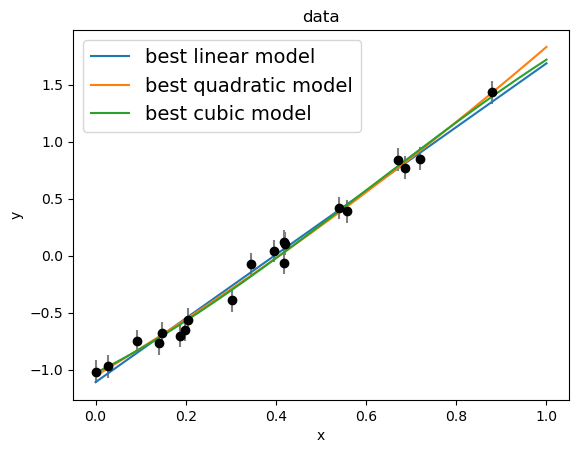

In [19]:
t = np.linspace(0, 1, 1000)
fig, ax = plt.subplots()
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(t, linearFunc(t, r1), label='best linear model')
ax.plot(t, quadraticFunc(t, r2), label='best quadratic model')
ax.plot(t, cubicFunc(t, r3), label='best cubic model')
ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='data');
plt.show()

## Question 2

In [20]:
data = np.array([[ 0.42, 0.72, 0. , 0.3 , 0.15,
 0.09, 0.19, 0.35, 0.4 , 0.54,
 0.42, 0.69, 0.2 , 0.88, 0.03,
 0.67, 0.42, 0.56, 0.14, 0.2 ],
 [ 0.33, 0.41, -0.22, 0.01, -0.05,
 -0.05, -0.12, 0.26, 0.29, 0.39,
 0.31, 0.42, -0.01, 0.58, -0.2 ,
 0.52, 0.15, 0.32, -0.13, -0.09 ],
 [ 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ]])
x, y, sigma_y = data


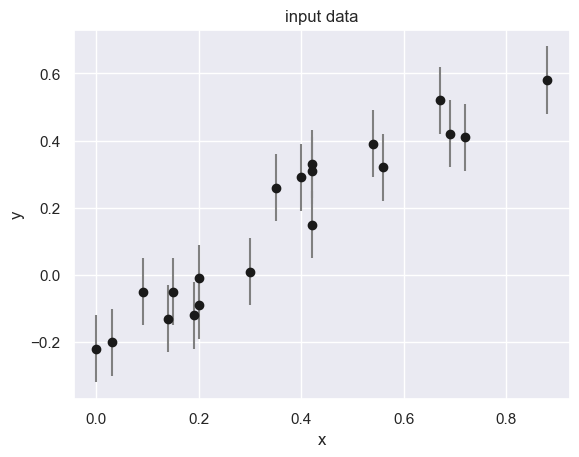

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # set default plot styles
x, y, sigma_y = data
fig, ax = plt.subplots()
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.set(xlabel='x', ylabel='y', title='input data');

In [24]:
# creating a function to compute these models

def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

In [25]:
def logL(theta, model=polynomial_fit, data=data):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
        for args in zip(y, y_fit, sigma_y))

In [26]:
# Using a direct optimization approach from scipy.optimize

def best_theta(degree, model=polynomial_fit, data=data):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, model, data)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)
theta1 = best_theta(1)
theta2 = best_theta(2)
theta1


array([-0.20329578,  0.97502245])

In [27]:
theta2

array([-0.25864531,  1.3934797 , -0.50798821])

(20,)

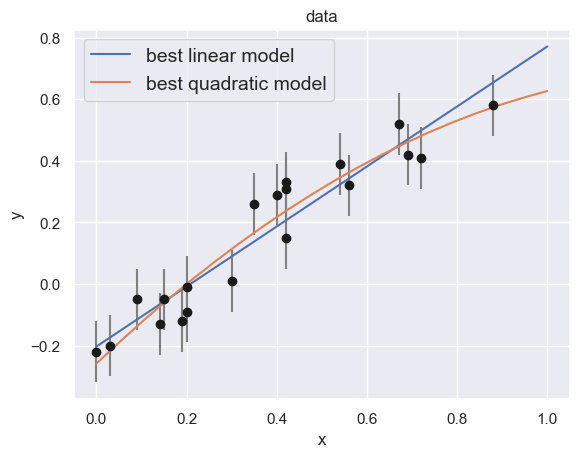

In [28]:
# Visually compare the maximum-likelihood degree-1, degree-2 and degree-3 models

xfit = np.linspace(0, 1, 20)
fig, ax = plt.subplots()
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xfit, polynomial_fit(theta1, xfit), label='best linear model')
ax.plot(xfit, polynomial_fit(theta2, xfit), label='best quadratic model')
ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='data');
y_predi1=polynomial_fit(theta1, xfit)
y_predi2=polynomial_fit(theta2, xfit)
y.shape


In [29]:
# Calculating AIC of linear model

n = len(y)
p=1
resid = np.subtract(y_predi1, y)
rss = np.sum(np.power(resid, 2))
aic_score1 = n*np.log(rss/n) + 2*p
aic_score1


-34.450965452661286

In [30]:
# Calculating AIC of quadratic model

p=2
resid = np.subtract(y_predi2, y)
rss = np.sum(np.power(resid, 2))
aic_score2 = n*np.log(rss/n) + 2*p
aic_score2

-35.429161243499955

#### The linear model is the best fit since it has lower AIC score magnitude.

In [31]:
# Calculating BIC of linear model

p=1
residual = np.subtract(y_predi1, y)
SSE = np.sum(np.power(residual, 2))
BIC = n*np.log(SSE/n) + p*np.log(n)
BIC


-33.455233179107296

In [32]:
# Calculating BIC of quadratic model

p=2
residual = np.subtract(y_predi2, y)
SSE = np.sum(np.power(residual, 2))
BIC = n*np.log(SSE/n) + p*np.log(n)
BIC


-33.437696696391974

####  The linear model is the better fit since it has lower BIC score in magnitude


In [33]:
# Calculating p value

print('p-value for Model 1 is: ',stats.spearmanr(y,y_predi1)[1])
print('p-value for Model 2 is: ',stats.spearmanr(y,y_predi2)[1])

p-value for Model 1 is:  0.9723832456858805
p-value for Model 2 is:  0.9723832456858805


## Question 3

Wind energy is renewable and in harmony with nature. It is another source of clean energy
compared to fossil fuels that pollute the lower atmosphere. The most important parameter of
wind power is wind speed. Mathematical methods are useful in measuring wind speed because
they are random. For this reason, the potential for wind speed can be measured using a possible
distribution. Accurate determination of wind speed distribution opportunities is critical in
assessing wind power potential in an area. In this research article, the author attempted to
determine the appropriate theoretical probability density function (pdf) (activity density) by
comparing 10 pdfs of average wind speed data in the Gelibolu region (northwest Turkey).

In determining the appropriate pdf, a method that combines 3 validity tests for eligibility was
used where the KS test was one of the three tests. The K-S test has been used correctly in this
paper and all the warnings explained on the Penn State website was also adressed in advanced
before implementing this test.

Link to Article: https://dergipark.org.tr/en/download/article-file/2151940


## Question 4(a)

In [34]:
from scipy.stats import norm
p = 1.7e-9
print('Significance value is: ',norm.isf(p))

Significance value is:  5.911017938341624


## Question 4(b)

In [35]:
p = 2e-7
print('Significance value is: ',norm.isf(p))

Significance value is:  5.068957749717791
